Make model

Overview with AI studio Auto-model
- Using Cleaned data to make a overview

![alt text](ImageResource/AI-overview.png)

From overview, select:
- general linear model
- Decision Tree
- Gradient Boost Trees

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



In [57]:

# Load and encode data
original_data = pd.read_csv('CleanedData.csv')
encode = original_data.apply(LabelEncoder().fit_transform)
data = encode#.sample(100, random_state= 42) # Random sampling

# Split features and target
X = data.drop('class', axis=1)
Y = data['class']


In [58]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# Define pipelines
pipeline_RFC = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_DT = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_LR = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegressionCV(cv=5, random_state=42, max_iter=1000))
])

# Train models
pipeline_RFC.fit(X_train, y_train)
pipeline_DT.fit(X_train, y_train)
pipeline_LR.fit(X_train, y_train)

# Make predictions
preds_RFC = pipeline_RFC.predict(X_test)
preds_DT = pipeline_DT.predict(X_test)
preds_LR = pipeline_LR.predict(X_test)


In [59]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest Classifier
cv_scores_RFC = cross_val_score(pipeline_RFC, X, Y, cv=5)
print(f'\nRandom Forest Classifier Cross-Validation Scores: {cv_scores_RFC}')
print(f'Mean CV Score: {cv_scores_RFC.mean()}')

# Cross-validation for Decision Tree Classifier
cv_scores_DT = cross_val_score(pipeline_DT, X, Y, cv=5)
print(f'\nDecision Tree Classifier Cross-Validation Scores: {cv_scores_DT}')
print(f'Mean CV Score: {cv_scores_DT.mean()}')

# Cross-validation for Logistic Regression
cv_scores_LR = cross_val_score(pipeline_LR, X, Y, cv=5)
print(f'\nLogistic Regression Cross-Validation Scores: {cv_scores_LR}')
print(f'Mean CV Score: {cv_scores_LR.mean()}')



Random Forest Classifier Cross-Validation Scores: [0.82584615 0.99753846 1.         1.         0.64778325]
Mean CV Score: 0.8942335733232284

Decision Tree Classifier Cross-Validation Scores: [0.82953846 0.99753846 1.         1.         0.83251232]
Mean CV Score: 0.9319178476695719

Logistic Regression Cross-Validation Scores: [0.69969231 0.91015385 0.80553846 0.99569231 0.50307882]
Mean CV Score: 0.7828311481621827


In [63]:
def evaluate_model(y_test, preds, model_name):
  accuracy = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds, average='weighted')
  recall = recall_score(y_test, preds, average='weighted')
  f1 = f1_score(y_test, preds, average='weighted')
  conf_matrix = confusion_matrix(y_test, preds)
  class_report = classification_report(y_test, preds)

  print(f"--- {model_name} ---")
  print(f'Accuracy: {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1 Score: {f1}')
  print('Confusion Matrix:')
  print(conf_matrix)
  print('--------------------\n')

# Evaluate each model and store the metrics
evaluate_model(y_test, preds_DT, "Decision Tree")
evaluate_model(y_test, preds_RFC, "Random Forest")
evaluate_model(y_test, preds_LR, "Logistic Regression")


--- Decision Tree ---
Accuracy: 0.9972919743968488
Precision: 0.9972931665120249
Recall: 0.9972919743968488
F1 Score: 0.9972920261305761
Confusion Matrix:
[[2078    7]
 [   4 1973]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2085
           1       1.00      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062

--------------------

--- Random Forest ---
Accuracy: 0.9982767109798129
Precision: 0.9982827911326059
Recall: 0.9982767109798129
F1 Score: 0.9982767848665149
Confusion Matrix:
[[2078    7]
 [   0 1977]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2085
           1       1.00      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00

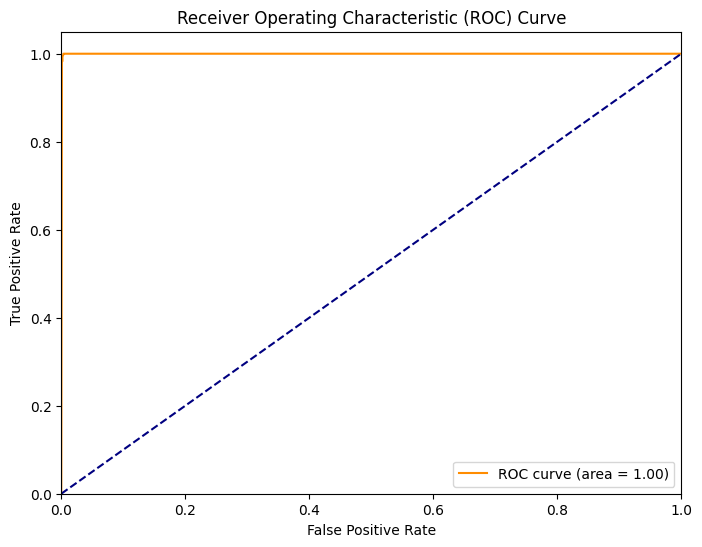

In [64]:
# Assuming you have a trained model named 'model' and test data 'X_test'
RFC_prob = pipeline_RFC.predict_proba(X_test)[:, 1]
RFC_fpr, RFC_tpr, RFC_thresholds = roc_curve(y_test, RFC_prob)
RFC_auc = roc_auc_score(y_test, RFC_prob)

plt.figure(figsize=(8, 6))
plt.plot(RFC_fpr, RFC_tpr, color='darkorange', label='ROC curve (area = {:.2f})'.format(RFC_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In case of data greater than 1000, rmse and r2 will nearly to be 0.00

In [65]:
import pickle

with open('model_LR.pkl', 'wb') as f:
    pickle.dump(pipeline_LR, f)